In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 15})

In [18]:
data = pd.read_csv('data/dataset_diabetes/diabetic_data.csv')
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [20]:
df = pd.read_csv('data/dataset_diabetes/IDs_mapping.csv', header=None, names=range(2))
table_names = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
groups = df[0].isin(table_names).cumsum()
annotations = {g.iloc[0,0]: g.iloc[1:] for k,g in df.groupby(groups)}

for name, table in annotations.items():
    table.columns = [name, 'description']
    print(table.head())

  admission_type_id    description
1                 1      Emergency
2                 2         Urgent
3                 3       Elective
4                 4        Newborn
5                 5  Not Available
   discharge_disposition_id                                        description
11                        1                                 Discharged to home
12                        2  Discharged/transferred to another short term h...
13                        3                      Discharged/transferred to SNF
14                        4                      Discharged/transferred to ICF
15                        5  Discharged/transferred to another type of inpa...
   admission_source_id                                      description
43                   1                               Physician Referral
44                   2                                  Clinic Referral
45                   3                                     HMO Referral
46                   4      

In [21]:
medication_columns = ['metformin',
                      'repaglinide',
                      'nateglinide',
                      'chlorpropamide',
                      'glimepiride',
                      'acetohexamide',
                      'glipizide',
                      'glyburide',
                      'tolbutamide',
                      'pioglitazone',
                      'rosiglitazone',
                      'acarbose',
                      'miglitol',
                      'troglitazone',
                      'tolazamide',
                      'examide',
                      'citoglipton',
                      'insulin',
                      'glyburide-metformin',
                      'glipizide-metformin',
                      'glimepiride-pioglitazone',
                      'metformin-rosiglitazone',
                      'metformin-pioglitazone'  ]

In [22]:
for column in data.columns:
    print(column, data[column].unique())

encounter_id [  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender ['Female' 'Male' 'Unknown/Invalid']
age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id [6 1 2 3 4 5 8 7]
discharge_disposition_id [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedic

insulin ['No' 'Up' 'Steady' 'Down']
glyburide-metformin ['No' 'Steady' 'Down' 'Up']
glipizide-metformin ['No' 'Steady']
glimepiride-pioglitazone ['No' 'Steady']
metformin-rosiglitazone ['No' 'Steady']
metformin-pioglitazone ['No' 'Steady']
change ['No' 'Ch']
diabetesMed ['No' 'Yes']
readmitted ['NO' '>30' '<30']


In [23]:
null_values = {'race': ['?'], 'gender': ['Unknown/Invalid'], 'weight': ['?'], 'admission_type_id': [5,6,8], 
               'discharge_disposition_id': [18,25,26], 'admission_source_id': [9,15,17,20,21], 'payer_code': ['?'],
               'medical_specialty': ['?']}
data_cleaned = data.copy()
for column, missings in null_values.items():
    for value in missings:
        data_cleaned[column].replace(to_replace=value, value=np.NaN, inplace=True)
    n_missing = np.sum(data_cleaned[column].isnull())
    print('%-25s %6d (%2.2f%%) missing' % (column, n_missing, 100 * n_missing/len(data_cleaned[column])))
    #print(data_cleaned[column].unique())

race                        2273 (2.23%) missing
gender                         3 (0.00%) missing
weight                     98569 (96.86%) missing
admission_type_id          10396 (10.22%) missing
discharge_disposition_id    4680 (4.60%) missing
admission_source_id         7067 (6.94%) missing
payer_code                 40256 (39.56%) missing
medical_specialty          49949 (49.08%) missing


In [24]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101763 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           91370 non-null float64
discharge_disposition_id    97086 non-null float64
admission_source_id         94699 non-null float64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 

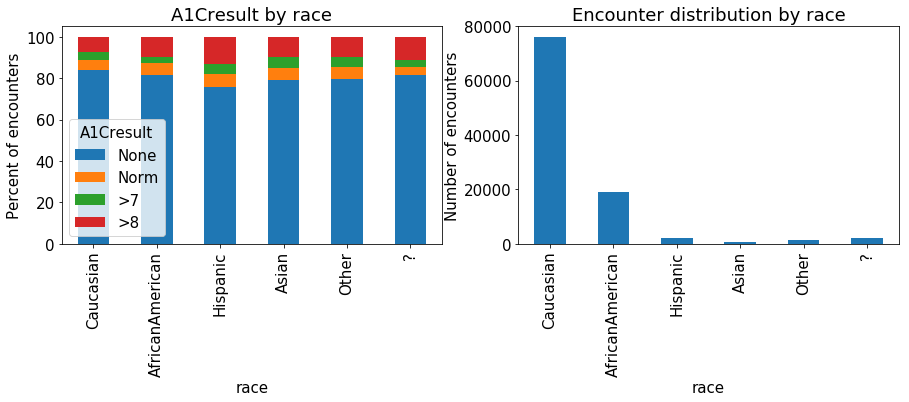

In [25]:
def graph_y_by_x(data, x_col, y_col, x_order = None, y_order = None, graph_y_dist = True):
    # Stacked bar graph showing how the data in x_col is distributed divided by the data in y_col
    # Option to re-order the data
    # Optional: bar graph showing the distribution of x_col
    N_x = data.groupby(x_col).count().iloc[:,0]
    y_by_x = data.groupby([x_col, y_col]).count().iloc[:,0].unstack(level = y_col)
    #print(N_x)
    #print(y_by_x)
    for column in y_by_x.columns:
        # Convert raw numbers to percents
        y_by_x[column] = 100 * y_by_x[column]/N_x

    if x_order is None:
        x_order = range(len(y_by_x))    
    if y_order is None:
        y_order = range(len(y_by_x.columns))

    _ = plt.figure(figsize = [15,4])
    ax1 = plt.subplot(1,2,1)
    _ = y_by_x.iloc[x_order, y_order].plot(kind = 'bar', stacked = True, ax = ax1)
    _ = plt.ylabel('Percent of encounters')
    _ = plt.title(y_col + ' by ' + x_col)

    if graph_y_dist:
        ax2 = plt.subplot(1,2,2)
        _ = N_x.iloc[x_order].plot(kind = 'bar', ax = ax2)
        #_ = plt.yscale('log')
        _ = plt.ylabel('Number of encounters')
        _ = plt.title('Encounter distribution by ' + x_col)

race_order = [3,1,4,2,5,0]
a1c_order = [2,3,0,1]
graph_y_by_x(data, 'race', 'A1Cresult', x_order = race_order, y_order = a1c_order)

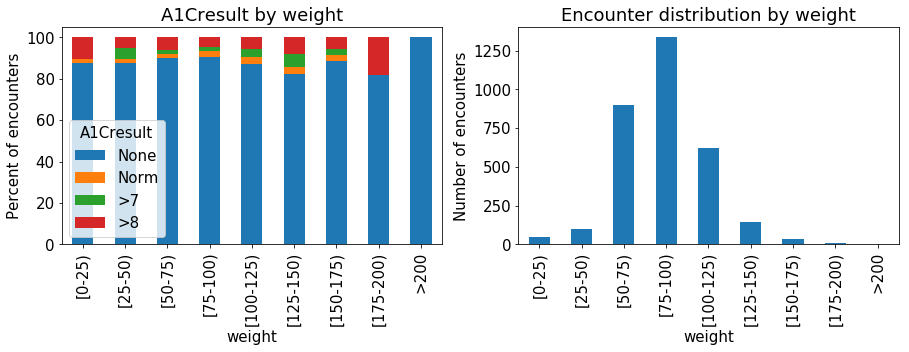

In [26]:
weight_order = [2,7,8,9,3,4,5,6,0]
graph_y_by_x(data, 'weight', 'A1Cresult', x_order = weight_order, y_order = a1c_order)
#_ = plt.yscale('log')

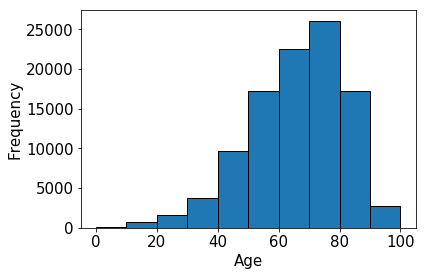

In [27]:
data_cleaned.age = data.age.apply(lambda s : int(s.split('-')[0][1:])+5) # Numerical age = midpoint of 10 year bin
bins = 10*np.arange(11)
_ = data_cleaned.age.plot(kind = 'hist', edgecolor = 'k', bins = bins)
_ = plt.xlabel('Age')
#_ = plt.yscale('log')
#_ = plt.ylim([1,100000])

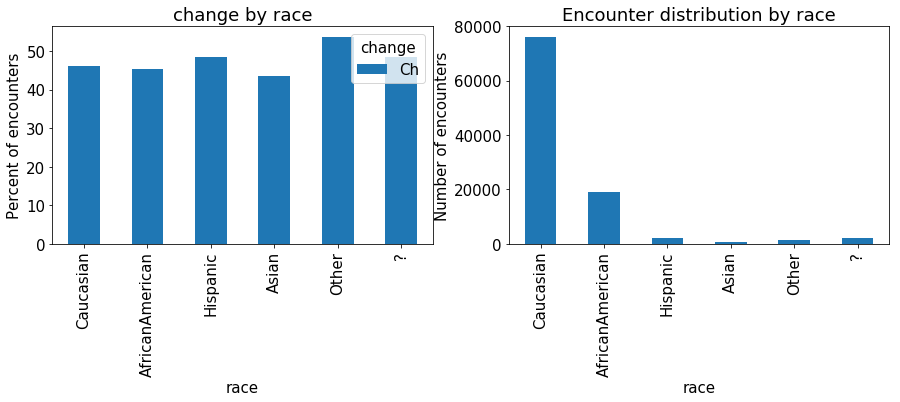

In [28]:
graph_y_by_x(data, 'race', 'change', x_order = race_order, y_order = [0])

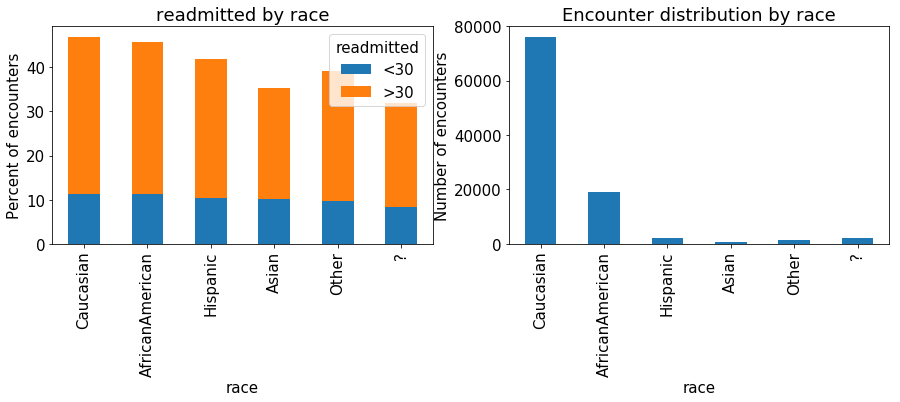

In [29]:
graph_y_by_x(data, 'race', 'readmitted', x_order = race_order, y_order = [0,1])

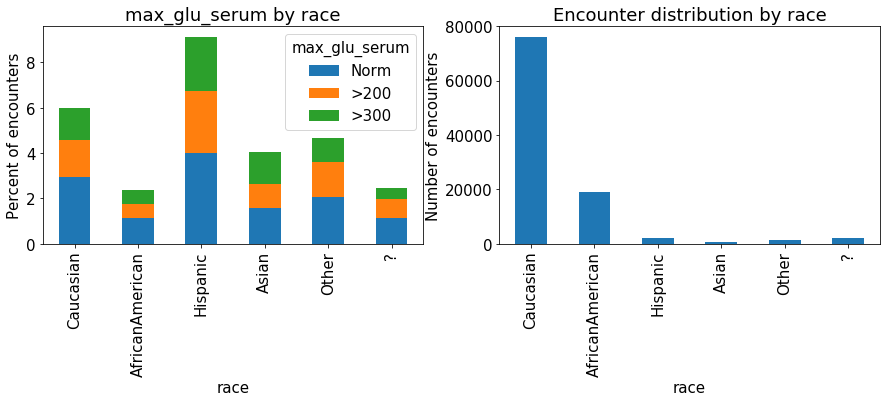

In [30]:
glu_order = [3,0,1]
graph_y_by_x(data, 'race', 'max_glu_serum', x_order = race_order, y_order = glu_order)

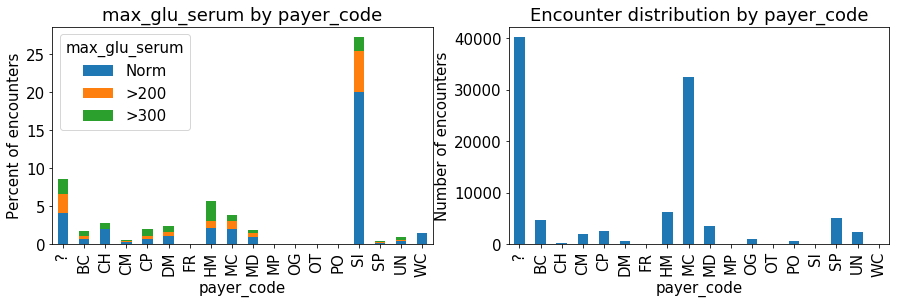

In [31]:
graph_y_by_x(data, 'payer_code', 'max_glu_serum', x_order = None, y_order = glu_order)

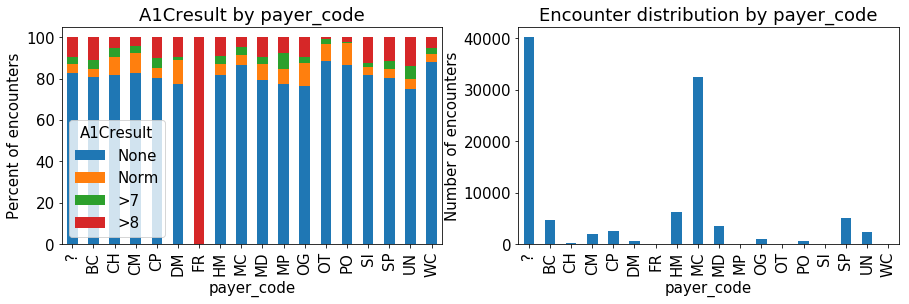

In [32]:
graph_y_by_x(data, 'payer_code', 'A1Cresult', x_order = None, y_order = a1c_order)

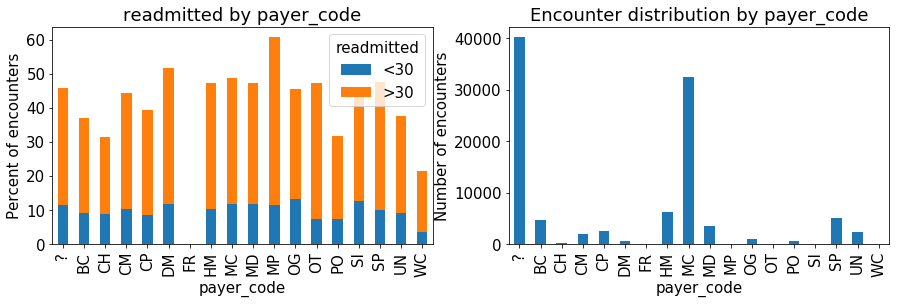

In [34]:
graph_y_by_x(data, 'payer_code', 'readmitted', x_order = None, y_order = [0,1])